# RandomForestRegressor

In this section, the cleaned dataset will be load and model. The cleaned dataset load is the cleaned.csv.

## Import libary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

# Import the regressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [16]:
# Cleaned data
data = pd.read_csv("../dataset/df_day_data.csv")
data = data.drop(['casualuser', 'registereduser'], axis=1)
X_actual = data.iloc[:, 2:3].values 
Y_actual = data.iloc[:, 9].values  

X_bike = pd.read_csv("../dataset/X_bike.csv")
Y_bike = pd.read_csv("../dataset/Y_bike.csv")

# With outliers
X_train = pd.read_csv("../dataset/with_outliers/X_train.csv")
X_test = pd.read_csv("../dataset/with_outliers/X_test.csv")
Y_train = pd.read_csv("../dataset/with_outliers/y_train.csv")
Y_test = pd.read_csv("../dataset/with_outliers/y_test.csv")

# Without outliers
no_X_train = pd.read_csv("../dataset/no_outliers/X_train.csv")
no_X_test = pd.read_csv("../dataset/no_outliers/X_test.csv")
no_Y_train = pd.read_csv("../dataset/no_outliers/y_train.csv")
no_Y_test = pd.read_csv("../dataset/no_outliers/y_test.csv")

In [46]:
# To make result more visualise
cols_X = ["temperature","humidity","windspeed"]
for col in cols_X:
    X_train = X_train.replace(to_replace=X_train[col].values, value=(np.round(X_train[col].values, 2)), regex=True)
    X_test = X_test.replace(to_replace=X_test[col].values, value=(np.round(X_test[col].values, 2)), regex=True)
    no_X_train = no_X_train.replace(to_replace=no_X_train[col].values, value=(np.round(no_X_train[col].values, 2)), regex=True)
    no_X_test = no_X_test.replace(to_replace=no_X_test[col].values, value=(np.round(no_X_test[col].values, 2)), regex=True)
    
cols_Y = ["count"]
for col in cols_Y:
    Y_train = Y_train.replace(to_replace=Y_train[col].values, value=(np.round(Y_train[col].values/100)*100), regex=True)
    Y_test = Y_test.replace(to_replace=Y_test[col].values, value=(np.round(Y_test[col].values/100)*100), regex=True)
    no_Y_train = no_Y_train.replace(to_replace=no_Y_train[col].values, value=(np.round(no_Y_train[col].values/100)*100), regex=True)
    no_Y_test = no_Y_test.replace(to_replace=no_Y_test[col].values, value=(np.round(no_Y_test[col].values/100)*100), regex=True)

### Flexible Model Selection

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [LinearRegression(),
         Ridge(),
         HuberRegressor(),
         ElasticNetCV(),
         DecisionTreeRegressor(),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

### Random Forest Regression Model

#### Why Forest Regression Model:

The basic idea behind this model is a collection of multiple random decision trees and it's much less sensitive to the training data. In short, this model randomly perform row sampling and feature sampling from the dataset forming sample datasets by a progress called Bootstrap. The sample flow of this model is listed below:

In [56]:
# Training & Prediction
# Function to perform training with gini.
def train_using_gini(x_train, x_test, y_train):
  
    # Creating the classifier object
    clf_gini = RandomForestClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
  
    # Performing training
    clf_gini.fit(x_train, y_train)
    return clf_gini
      
# Function to perform training with entropy.
def tarin_using_entropy(x_train, x_test, y_train):
  
    # Decision tree with entropy
    clf_entropy = RandomForestClassifier(
            criterion = "entropy", random_state = 100,
            max_depth = 3, min_samples_leaf = 5)
  
    # Performing training
    clf_entropy.fit(x_train, y_train)
    return clf_entropy

# Function to make predictions
def prediction(x_test, clf_object):
  
    # Predicton on test with giniIndex
    y_pred = clf_object.predict(x_test)    
    print("Predicted values:")
    print(y_pred)
    print("")
    return y_pred
      
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
        
    print("Confusion Matrix: ")
    print(confusion_matrix(y_test, y_pred))
    print("")
      
    print ("Accuracy : ",
    accuracy_score(y_test,y_pred))
    print("")
      
    print("Report : ")
    print(classification_report(y_test, y_pred))
    print("")

#### With_outliers : X_train, Y_train, X_test, Y_test

In [60]:
# Building Phase
x, y, x_train, x_test, y_train, y_test = X_bike, Y_bike, X_train, X_test, Y_train, Y_test
clf_gini = train_using_gini(x_train, x_test, y_train)
clf_entropy = tarin_using_entropy(x_train, x_test, y_train)

# Dataset Information
print ("=====================")
print (" Dataset Information ")
print ("=====================")
print ("Dataset Used   : day.csv")
print ("Dataset Length :", len(data))
print ("Dataset Shape  :", data.shape)
s = ""
for col in data.columns[:].values:
    s = col + ", " + s
print ("Dataset Column :", s)
print ("")

# Prediction Using GiniIndex
print ("=====================")
print (" The GiniIndex Train ")
print ("=====================")
y_pred_gini = prediction(x_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
    
# Prediction Using Entropy
print ("=====================")
print (" The Entropy Train   ")
print ("=====================")
y_pred_entropy = prediction(x_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)


 Dataset Information 
Dataset Used   : day.csv
Dataset Length : 718
Dataset Shape  : (718, 10)
Dataset Column : count, windspeed, humidity, temperature, weather, weekday, holiday, month, year, season, 

 The GiniIndex Train 
Predicted values:
[5000. 5000. 2000. 2000. 4000. 4000. 4000. 6000. 6000. 2000. 2000. 2000.
 2000. 5000. 5000. 5000. 7000. 6000. 2000. 2000. 7000. 4000. 5000. 5000.
 2000. 7000. 5000. 5000. 7000. 7000. 2000. 5000. 6000. 5000. 2000. 4000.
 7000. 7000. 2000. 4000. 7000. 2000. 5000. 4000. 7000. 7000. 3000. 4000.
 4000. 2000. 7000. 7000. 6000. 7000. 5000. 4000. 4000. 6000. 7000. 2000.
 7000. 4000. 7000. 7000. 7000. 4000. 5000. 6000. 7000. 6000. 7000. 7000.
 6000. 7000. 5000. 6000. 4000. 7000. 4000. 2000. 5000. 5000. 5000. 2000.
 4000. 7000. 5000. 7000. 7000. 4000. 2000. 2000. 7000. 7000. 7000. 4000.
 4000. 7000. 5000. 2000. 4000. 6000. 6000. 7000. 4000. 5000. 7000. 7000.
 6000. 2000. 4000. 5000. 5000. 2000. 2000. 5000. 5000. 4000. 7000. 6000.
 2000. 5000. 2000. 4000. 40

#### No_outliers : no_X_train, no_Y_train, no_X_test, no_Y_test

In [59]:
# Building Phase
x, y, x_train, x_test, y_train, y_test = X_bike, Y_bike, no_X_train, no_X_test, no_Y_train, no_Y_test
clf_gini = train_using_gini(x_train, x_test, y_train)
clf_entropy = tarin_using_entropy(x_train, x_test, y_train)

# Dataset Information
print ("=====================")
print (" Dataset Information ")
print ("=====================")
print ("Dataset Used   : day.csv")
print ("Dataset Length :", len(data))
print ("Dataset Shape  :", data.shape)
s = ""
for col in data.columns[:].values:
    s = col + ", " + s
print ("Dataset Column :", s)
print ("")

# Prediction Using GiniIndex
print ("=====================")
print (" The GiniIndex Train ")
print ("=====================")
y_pred_gini = prediction(x_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)
    
# Prediction Using Entropy
print ("=====================")
print (" The Entropy Train   ")
print ("=====================")
y_pred_entropy = prediction(x_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)


 Dataset Information 
Dataset Used   : day.csv
Dataset Length : 718
Dataset Shape  : (718, 10)
Dataset Column : count, windspeed, humidity, temperature, weather, weekday, holiday, month, year, season, 

 The GiniIndex Train 
Predicted values:
[7000. 7000. 7000. 6000. 5000. 7000. 4000. 2000. 2000. 2000. 6000. 6000.
 4000. 4000. 4000. 2000. 4000. 6000. 4000. 7000. 4000. 2000. 5000. 7000.
 5000. 6000. 4000. 7000. 2000. 4000. 4000. 6000. 7000. 5000. 7000. 7000.
 7000. 4000. 4000. 2000. 2000. 4000. 2000. 7000. 5000. 4000. 4000. 4000.
 4000. 7000. 4000. 7000. 7000. 7000. 5000. 6000. 4000. 2000. 7000. 7000.
 5000. 7000. 7000. 2000. 5000. 7000. 4000. 4000. 5000. 7000. 5000. 7000.
 2000. 2000. 2000. 4000. 4000. 7000. 2000. 4000. 4000. 2000. 4000. 7000.
 6000. 7000. 7000. 4000. 2000. 2000. 7000. 7000. 4000. 7000. 7000. 2000.
 6000. 4000. 7000. 6000. 4000. 4000. 4000. 7000. 7000. 2000. 7000. 4000.
 2000. 7000. 2000. 7000. 2000. 7000. 4000. 6000. 6000. 2000. 4000. 2000.
 7000. 7000. 4000. 2000. 40

#### For Visualising Result:

In [67]:
# Fitting Random Forest Regression to the dataset  
def visualise_prediction(x,y):
    # Create regressor object
    regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

    # Fit the regressor with x and y data
    regressor.fit(x, y)  

    Y_pred = regressor.predict(np.array([6.5]).reshape(1, 1))  # test the output by changing values

    # Visualising the Random Forest Regression results
    # Arange values from min value of x to max value of x with a difference of 0.01 between two consecutive values
    X_grid = np.arange(min(x), max(x), 0.01) 

    # Reshape for reshaping the data into a len(X_grid)*1 array            
    X_grid = X_grid.reshape((len(X_grid), 1))

    # Scatter plot for original data
    plt.scatter(x, y, color = 'blue')  

    # Plot predicted data
    plt.plot(X_grid, regressor.predict(X_grid), color = 'red') 
    plt.title('Random Forest Regression')
    plt.title('Random Forest Regression')
    plt.xlabel('Month')
    plt.ylabel('Rental Count')
    t = ("This red line was the prediction for next year")
    plt.text(2.5, 750, t, ha='left', rotation=5, wrap=True)
    plt.show()

    # Explanation
    s = ("This blue dots representing the rental count data for year 2022 ")
    s2 = ("where their average count is found and joint to form a line of prediction for next year.")
    print(s)
    print(s2)
    print("---------------------")
    print(" Prediction for 2023")
    print("---------------------")
    mnth = ["Jan: ", "Feb: ", "Mar: ", "Apr: ", "May: ", "Jun: ", "Jul: ", "Aug: ", "Sep: ", "Oct: ", "Nov: ", "Dec: "]
    cnt = 1
    c = 0
    for n in np.round(regressor.predict(X_grid),0):
        if (cnt == 1 or cnt == 100 or cnt == 200 or cnt == 300 or cnt == 400 or cnt == 500 or cnt == 600 or cnt == 700 or cnt == 800 or cnt == 900 or cnt == 1000 or cnt == 1100 or cnt == 1200):
            print(mnth[c], n)
            c += 1
        cnt += 1

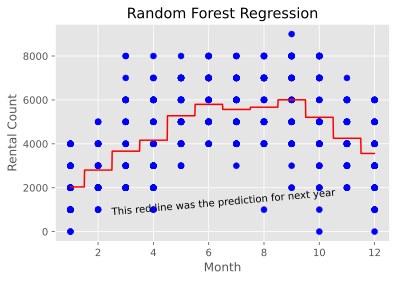

This blue dots representing the rental count data for year 2022 
where their average count is found and joint to form a line of prediction for next year.
---------------------
 Prediction for 2023
---------------------
Jan:  2035.0
Feb:  2803.0
Mar:  3665.0
Apr:  4164.0
May:  5277.0
Jun:  5797.0
Jul:  5565.0
Aug:  5667.0
Sep:  6003.0
Oct:  5208.0
Nov:  4252.0
Dec:  3559.0


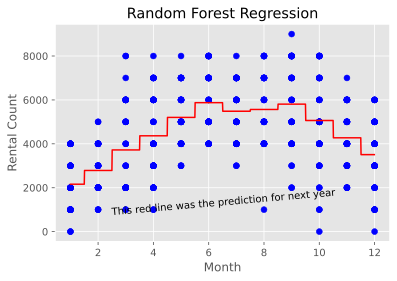

This blue dots representing the rental count data for year 2022 
where their average count is found and joint to form a line of prediction for next year.
---------------------
 Prediction for 2023
---------------------
Jan:  2159.0
Feb:  2785.0
Mar:  3720.0
Apr:  4365.0
May:  5203.0
Jun:  5874.0
Jul:  5484.0
Aug:  5564.0
Sep:  5807.0
Oct:  5062.0
Nov:  4274.0
Dec:  3507.0


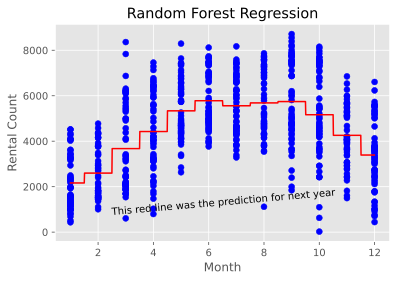

This blue dots representing the rental count data for year 2022 
where their average count is found and joint to form a line of prediction for next year.
---------------------
 Prediction for 2023
---------------------
Jan:  2162.0
Feb:  2596.0
Mar:  3675.0
Apr:  4425.0
May:  5336.0
Jun:  5780.0
Jul:  5559.0
Aug:  5685.0
Sep:  5743.0
Oct:  5164.0
Nov:  4258.0
Dec:  3391.0


In [73]:
# For test data with outliers
x = X_train.iloc[:, 2:3].values 
y = Y_train.iloc[:,:1].values 
visualise_prediction(x,y)

# For test data without outliers
x_no = no_X_train.iloc[:, 2:3].values 
y_no = no_Y_train.iloc[:,:1].values 
visualise_prediction(x_no,y_no)

# For actual data
x_real = data.iloc[:, 2:3].values 
y_real = data.iloc[:, 9].values   
visualise_prediction(x_real,y_real)

#### For calculating score for individual decision trees:

In [30]:
rspy_train = data

In [31]:
# Fitting Random Forest Regression to the dataset, mse represent mean_square_eror
regressor_1 = RandomForestRegressor(n_estimators=1, 
                                    criterion='mse', 
                                    max_depth=1, max_features='auto',
                                    bootstrap=True).fit(np.array(rspy_train['count']).reshape(-1, 1), rspy_train['month'])
regressor_2 = RandomForestRegressor(n_estimators=2, 
                                    criterion='mse', 
                                    max_depth=1, max_features='auto',
                                    bootstrap=True).fit(np.array(rspy_train['count']).reshape(-1, 1), rspy_train['month'])

In [32]:
# Score
regressor_1_score = regressor_1.score(np.array(rspy_train['count']).reshape(-1, 1), rspy_train['month'])
regressor_2_score = regressor_2.score(np.array(rspy_train['count']).reshape(-1, 1), rspy_train['month'])
 
print('Model           : RandomForestRegressor')
print('Score for tree 1: ', np.round(regressor_1_score, 4))
print('Score for tree 2: ', np.round(regressor_2_score, 4))

Model           : RandomForestRegressor
Score for tree 1:  0.1195
Score for tree 2:  0.1231


## 2.9 Export Diagram